In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [5]:
# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
# Нормалізація зображень до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# Додавання каналу для зображень (оскільки це чорно-білі зображення, канал один)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [11]:
# Перетворення міток у формат one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [35]:
# Створення моделі
from tensorflow.keras.callbacks import EarlyStopping

# Додавання dropout до моделі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.6567 - loss: 0.9543 - val_accuracy: 0.8408 - val_loss: 0.4340
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8414 - loss: 0.4284 - val_accuracy: 0.8712 - val_loss: 0.3564
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8686 - loss: 0.3567 - val_accuracy: 0.8854 - val_loss: 0.3146
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8814 - loss: 0.3182 - val_accuracy: 0.8897 - val_loss: 0.3021
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8911 - loss: 0.2972 - val_accuracy: 0.8892 - val_loss: 0.3020
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8990 - loss: 0.2779 - val_accuracy: 0.9012 - val_loss: 0.2702
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9033 - loss: 0.2586 - val_accuracy: 0.9001 - val_loss: 0.2750
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9098 - loss: 0.2442 - 

In [42]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9136 - loss: 0.2881
Test accuracy: 0.9157999753952026


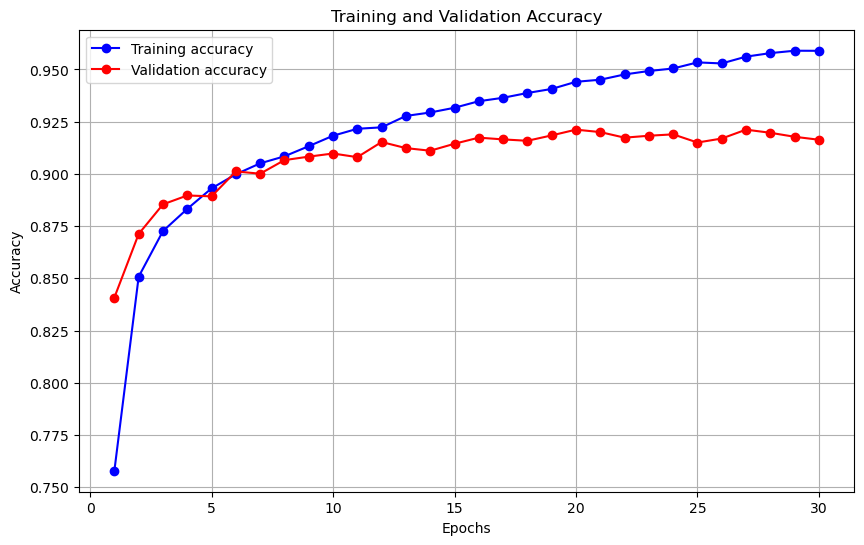

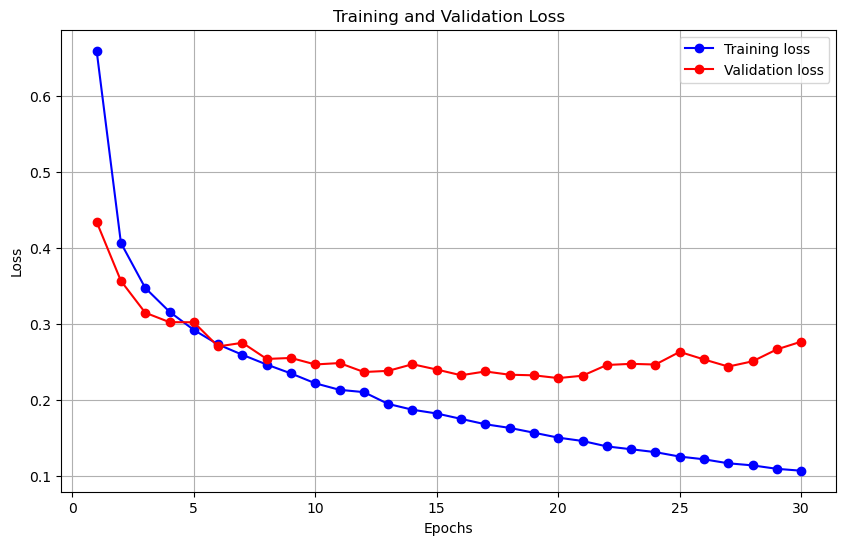

In [52]:
# Витягуємо дані про точність та втрати з історії тренування
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Будуємо графік точності
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Будуємо графік втрат
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()